## Results Productivity

In [1]:
import numpy as np
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
import pickle
import palettable
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard
from src.impact_calculation.impact_heat import *
from src.util.plots import *

fig_dir = '../../data_analysis/figures/'

2020-12-03 13:49:03,713 - climada - DEBUG - Loading default config file: /Users/zeliestalhanske/Documents/GitHub/climada_python/climada/conf/defaults.conf


In [2]:
directory_exposures = '../../input_data/exposures/'
exposures = {}
for code, category in {'O': 'Over 75', 'U': 'Under 75'}.items():    
    exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_', code,'.h5'])
    exposures[category] = Exposures()
    exposures[category].read_hdf5(exposures_file)
    #exposures[category] = Exposures(exposures[category])
    exposures[category].check()


2020-11-30 12:03:07,005 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O.h5
2020-11-30 12:03:08,991 - climada.entity.exposures.base - INFO - centr_ not set.
2020-11-30 12:03:08,992 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-30 12:03:08,992 - climada.entity.exposures.base - INFO - cover not set.
2020-11-30 12:03:08,993 - climada.entity.exposures.base - INFO - category_id not set.
2020-11-30 12:03:08,994 - climada.entity.exposures.base - INFO - region_id not set.
2020-11-30 12:03:08,996 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_U.h5
2020-11-30 12:03:10,954 - climada.entity.exposures.base - INFO - centr_ not set.
2020-11-30 12:03:10,955 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-30 12:03:10,955 - climada.entity.exposures.base - INFO - cover not set.
2020-11-30 12:03:10,956 - climada.entity.exposures.base - INFO - category_id not s

In [6]:
exposures['Over 75']

,latitude,longitude,if_heat,category,value,geometry,index_right,canton,total_population_canton,daily_deaths
0,46.150832,5.972096,1.0,Over 75,0.000000,POINT (5.972095716591816 46.15083226217903),20.0,Genève,63509,6.751452
1,46.148983,5.968262,1.0,Over 75,0.000047,POINT (5.96826201174451 46.14898288609249),20.0,Genève,63509,6.751452
2,46.148100,5.969580,1.0,Over 75,0.000000,POINT (5.9695803288723 46.14810036009231),20.0,Genève,63509,6.751452
3,46.149050,5.973438,1.0,Over 75,0.000047,POINT (5.973438219478164 46.14905029092692),20.0,Genève,63509,6.751452
4,46.159910,5.978325,1.0,Over 75,0.000000,POINT (5.978324974923448 46.15991027871713),20.0,Genève,63509,6.751452
5,46.156363,5.982304,1.0,Over 75,0.000000,POINT (5.982304162022924 46.15636289736256),20.0,Genève,63509,6.751452
6,46.149218,5.986379,1.0,Over 75,0.000000,POINT (5.986378794282616 46.14921776393132),20.0,Genève,63509,6.751452
7,46.166340,5.988512,1.0,Over 75,0.000189,POINT (5.988511792775107 46.16633975735711),20.0,Genève,63509,6.751452
8,46.166406,5.993690,1.0,Over 75,0.000094,POINT (5.993689674200166 46.16640623282535),20.0,Genève,63509,6.751452
9,46.168255,5.997525,1.0,Over 75,0.000189,POINT (5.997525468104374 46.16825474635868),20.0,Genève,63509,6.751452


(0, 0.000140470624193218)

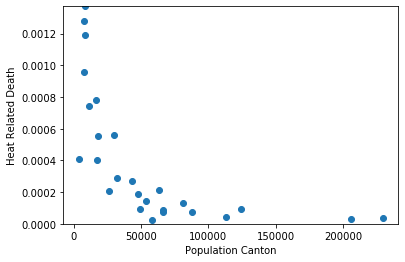

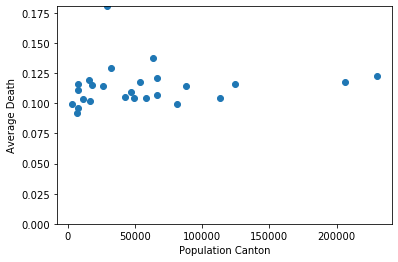

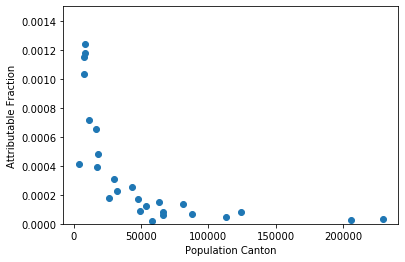

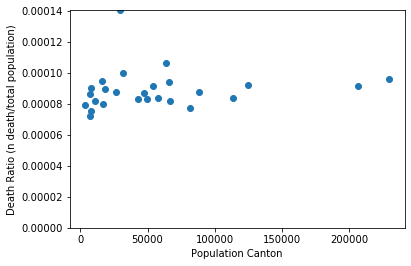

In [10]:
tot_pop = exposures['Over 75']['total_population_canton'].unique()
daily_death = exposures['Over 75']['daily_deaths'].unique()
heat_death, af, average_death = death_impact(100, tot_pop, daily_death, t=27)
death_ratio = (exposures['Over 75']['daily_deaths']/exposures['Over 75']['total_population_canton']).unique()

fig,ax = plt.subplots()
#for n in range(len(heat_death)):
#    ax.scatter(tot_pop,heat_death[n])
ax.scatter(tot_pop,heat_death)
ax.set_ylim(0,np.max(heat_death))
ax.set_xlabel('Population Canton')
ax.set_ylabel('Heat Related Death')

fig,ax = plt.subplots()
#for n in range(len(heat_death)):
#    ax.scatter(tot_pop,heat_death[n])
ax.scatter(tot_pop,average_death)
ax.set_ylim(0,np.max(average_death))
ax.set_xlabel('Population Canton')
ax.set_ylabel('Average Death')

fig,ax = plt.subplots()
#for n in range(len(heat_death)):
#    ax.scatter(tot_pop,heat_death[n])
ax.scatter(tot_pop,af)
ax.set_xlabel('Population Canton')
ax.set_ylabel('Attributable Fraction')
ax.set_ylim(0,0.0015)

fig,ax = plt.subplots()
#for n in range(len(heat_death)):
#    ax.scatter(tot_pop,heat_death[n])
ax.scatter(tot_pop,death_ratio)
ax.set_xlabel('Population Canton')
ax.set_ylabel('Death Ratio (n death/total population)')
ax.set_ylim(0,np.max(death_ratio))


## Damage cost for each scenario, year and age category

In [4]:
pickle_in = \
open('../../output/mortality_results/impact_CH_values_30mc.pickle','rb')
impacts_mortality = pickle.load(pickle_in)

In [25]:
impacts_mortality.agg_impacts_mc

{'RCP26': {2020: {'Over 75': [471.89476941931315,
    360.6676736544221,
    723.4778145430347,
    84.30456591434223,
    840.9436861580334],
   'Under 75': [151.89717237010456,
    51.48754693077315,
    238.64563153815337,
    255.17780362740373,
    187.38227489134493]},
  2050: {'Over 75': [1315.769948556494,
    1009.7890393624318,
    565.8593944052317,
    923.4061206990667,
    1078.1865960482594],
   'Under 75': [31.268104969433885,
    202.37426601788724,
    47.157354923144005,
    245.5758853303947,
    192.5027760334707]}},
 'RCP85': {2020: {'Over 75': [986.2437436431771,
    377.6329543063739,
    948.9840468579764,
    476.3384104390027,
    207.76091950837295],
   'Under 75': [300.8717703902678,
    206.61355320560506,
    341.20389961479384,
    443.6925945898216,
    97.04373050328991]},
  2050: {'Over 75': [283.9020492474374,
    794.3977697828075,
    1102.5068963081676,
    273.6427573288366,
    879.8146790062369],
   'Under 75': [51.70709176349989,
    244.90854

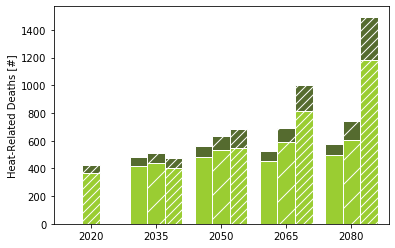

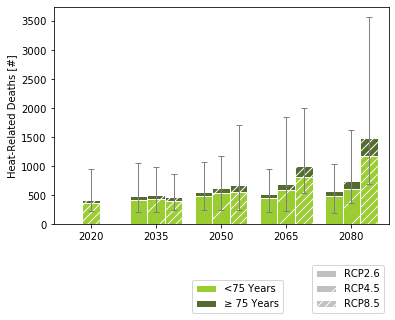

In [22]:
plot_impacts_heat(impacts_mortality.agg_impacts_mc, unit='Heat-Related Deaths [#]', impact_type='mortality', color=['yellowgreen', 'darkolivegreen'], labels_cat=['<75 Years', '≥ 75 Years'], save=True)

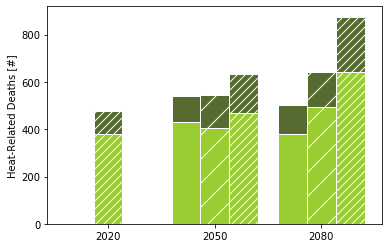

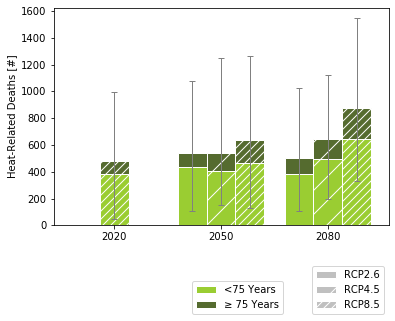

In [3]:
plot_impacts_heat(impacts_mortality.agg_impacts_mc, unit='Heat-Related Deaths [#]', impact_type='mortality', color=['yellowgreen', 'darkolivegreen'], labels_cat=['<75 Years', '≥ 75 Years'], save=True, ratio=0.5857433911084499)


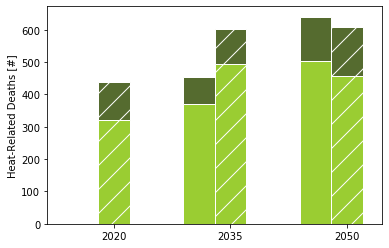

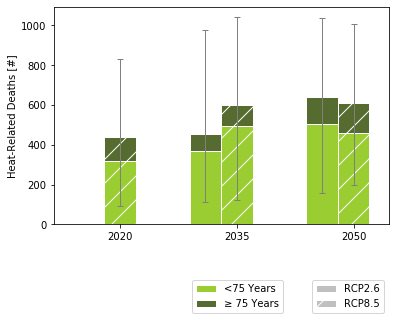

In [5]:
plot_impacts_heat(impacts_mortality.agg_impacts_mc, unit='Heat-Related Deaths [#]', impact_type='mortality', color=['yellowgreen', 'darkolivegreen'], labels_cat=['<75 Years', '≥ 75 Years'], save=True, ratio=0.5857433911084499)


In [23]:
np.median(impacts_mortality.agg_impacts_mc['RCP85'][2080]['Over 75'])+np.median(impacts_mortality.agg_impacts_mc['RCP85'][2080]['Under 75'])-np.median(impacts_mortality.agg_impacts_mc['RCP26'][2080]['Over 75'])-np.median(impacts_mortality.agg_impacts_mc['RCP26'][2080]['Under 75'])


6.136357399216102e-06

In [4]:
def median_death(scenario, year, category='all'):
    if category=='all':
        median_death = (np.median(impacts_mortality.agg_impacts_mc[scenario][year]['Over 75'])+np.median(impacts_mortality.agg_impacts_mc[scenario][year]['Under 75']))
    else:    
        median_death = np.median(impacts_mortality.agg_impacts_mc[scenario][year][category])
    return median_death

def percentile_death(scenario, year, percentile, category='all'):
    if category=='all':
        median_death = (np.percentile(impacts_mortality.agg_impacts_mc[scenario][year]['Over 75'], percentile)+np.percentile(impacts_mortality.agg_impacts_mc[scenario][year]['Under 75'], percentile))
    else:    
        median_death = np.percentile(impacts_mortality.agg_impacts_mc[scenario][year][category],percentile)
    return median_death

def max_death(scenario, year, category='all'):
    if category=='all':
        median_death = (np.max(impacts_mortality.agg_impacts_mc[scenario][year]['Over 75'])+np.max(impacts_mortality.agg_impacts_mc[scenario][year]['Under 75']))
    else:    
        median_death = np.max(impacts_mortality.agg_impacts_mc[scenario][year][category])
    return median_death

## Spatial Impact

In [98]:
8237700/(exposures['Over 75']['total_population_canton'].unique().sum()+exposures['Under 75']['total_population_canton'].unique().sum())


0.5857433911084499

In [29]:
from src.write_entities.define_exposures import *

directory_exposures = '../../input_data/exposures/'
file_info='../../input_data/exposures/age_categories.csv'
file_locations='../../input_data/exposures/STATPOP2018.csv'
shp_cantons='../../input_data/shapefiles/KANTONS_projected_epsg4326/swissBOUNDARIES3D_1_3_TLM_KANTONSGEBIET_epsg4326.shp'
annual_deaths='../../input_data/impact_functions/annual_deaths.xlsx'

exposures_all = call_exposures_switzerland_mortality(file_info, file_locations, shp_cantons, annual_deaths, population_ratio=False) #number of people instead of ratio

exposures = {}
exposures['Over 75'] = exposures_all[exposures_all['category']=='Over 75']
exposures['Over 75']  = Exposures(exposures['Over 75'] )
exposures['Under 75'] = exposures_all[exposures_all['category']=='Under 75']
exposures['Under 75']  = Exposures(exposures['Under 75'] )

2020-12-02 23:23:42,424 - climada.util.coordinates - INFO - Setting geometry points.
2020-12-02 23:24:29,784 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.


In [31]:
pickle_in = \
open('../../output/mortality_results/impact_100mc2.pickle','rb')
impacts_mortality = pickle.load(pickle_in)
impacts_mortality.years = [2020,2035,2050,2065,2080]
impacts_mortality.categories = ['Under 75','Over 75']

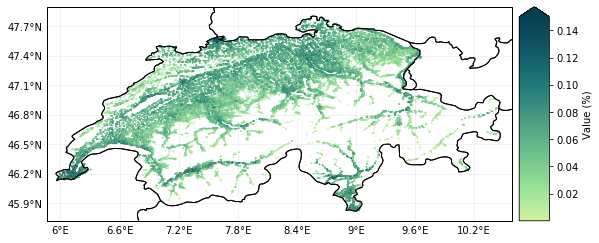

In [90]:
category = 'Over 75'
categories_code = {'Over 75':'O', 'Under 75':'U'}
cm = palettable.cartocolors.sequential.Emrld_7.mpl_colormap

impact = impacts_mortality.matrix_as_impact(impacts_mortality.median_impact_matrices['RCP85'][2050][category], exposures[category], percentage=True, unit='%')
impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1, vmax=0.15, extend='max')

#plt.savefig(''.join([fig_dir,'spatial_impact_2050_o75.pdf']),bbox_inches='tight')

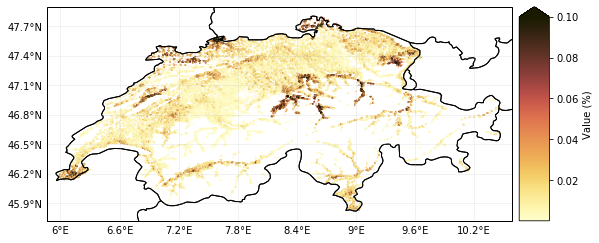

In [27]:
category = 'Over 75'

impact = impacts_mortality.matrix_as_impact(impacts_mortality.median_impact_matrices['RCP85'][2050][category], exposures[category],percentage=True, unit='%')
impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1,vmax=0.1, extend='max')


In [51]:
test = exposures['Over 75'].copy()
test['heat_death (%)'] = impact._build_exp_event(1)['value']
test = test[test['value']>3]
test['deaths_ratio'] = test['total_population_canton']/test['daily_deaths']
test = pd.DataFrame(test)

In [228]:
test

,latitude,longitude,if_heat,category,value,geometry,index_right,canton,total_population_canton,daily_deaths,heat_death (%),deaths_ratio
7,46.166340,5.988512,1.0,Over 75,12,POINT (5.988511792775107 46.16633975735711),20.0,Genève,63509,6.751452,0.045844,0.000106
8,46.166406,5.993690,1.0,Over 75,6,POINT (5.993689674200166 46.16640623282535),20.0,Genève,63509,6.751452,0.022328,0.000106
9,46.168255,5.997525,1.0,Over 75,12,POINT (5.997525468104374 46.16825474635868),20.0,Genève,63509,6.751452,0.044656,0.000106
10,46.152032,5.995366,1.0,Over 75,6,POINT (5.995365720649056 46.15203232692217),20.0,Genève,63509,6.751452,0.021728,0.000106
12,46.177249,5.997287,1.0,Over 75,60,POINT (5.997287294240746 46.17724881314683),20.0,Genève,63509,6.751452,0.234650,0.000106
17,46.143170,6.005955,1.0,Over 75,6,POINT (6.005955467582104 46.14317034145362),20.0,Genève,63509,6.751452,0.021728,0.000106
22,46.187323,6.011270,1.0,Over 75,6,POINT (6.011269884027119 46.18732345200088),20.0,Genève,63509,6.751452,0.023366,0.000106
24,46.172998,6.016826,1.0,Over 75,9,POINT (6.016825836071654 46.17299830628289),20.0,Genève,63509,6.751452,0.033259,0.000106
27,46.212654,6.022269,1.0,Over 75,6,POINT (6.022269119565309 46.21265390730527),20.0,Genève,63509,6.751452,0.023633,0.000106
28,46.223528,6.028467,1.0,Over 75,6,POINT (6.028467173704949 46.22352801015089),20.0,Genève,63509,6.751452,0.021179,0.000106


In [22]:
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
color = get_colors(40) # sample return:  ['#8af5da', '#fbc08c', '#b741d0', '#e599f1', '#bbcb59', '#a2a6c0']



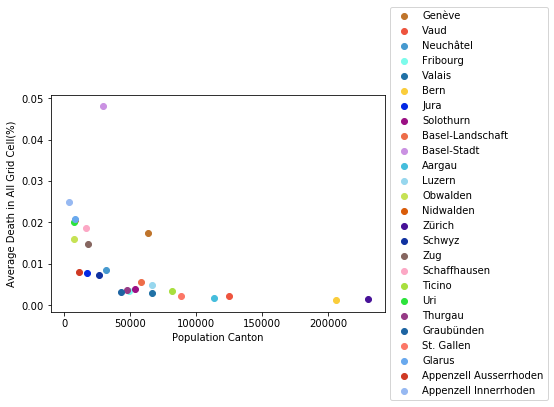

In [54]:
fig,ax = plt.subplots()
for n,canton in enumerate(test['canton'].unique()):
    ax.scatter(test[test['canton']==canton]['total_population_canton'].unique(), test[test['canton']==canton]['heat_death (%)'].mean(), label=canton, color= color[n])
#ax.set_xlim([0,0.00015]) 
ax.set_xlabel('Population Canton')
ax.set_ylabel('Average Death in All Grid Cell(%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
def death_impact(t0=25,pop_tot,daily_death):
    d=10
    
    

In [208]:
test[test['canton']==canton]['deaths_ratio']

array([2.25048402, 0.562621  , 1.12524201, 0.1125242 , 0.75016134,
       0.51934247, 0.42196575, 0.19857212, 0.14364792, 0.37508067,
       0.21778878, 0.4500968 , 0.35533958, 0.13502904, 0.32149772,
       0.24112329, 0.14065525, 0.17766979, 0.30688418, 0.12502689,
       0.67514521, 0.18247168, 0.29354139, 0.2813105 , 0.15003227,
       0.13778474, 0.2250484 , 0.25005378, 0.96449315, 0.07419178,
       0.1687863 , 0.19289863, 0.48224658, 0.02464034, 0.16466956,
       0.27005808, 0.21098288, 0.17311416, 0.3375726 , 0.18754033,
       0.25967123, 0.23280869, 0.15344209, 0.10386849, 0.10076794,
       0.39714424, 0.09928606, 0.09784713, 0.20458946, 0.03358931,
       0.12056164, 0.0813428 , 0.12738589, 0.12983562, 0.0888349 ,
       0.1467707 , 0.08335126, 0.11844653, 0.61376837, 0.0348013 ,
       0.04964303, 0.09509087, 0.11067954, 0.13238141, 0.10229473,
       0.07182396, 0.16074886, 0.11443139, 0.10889439, 0.09123584,
       0.11640435, 1.68786301, 0.10549144, 0.04754544, 0.03836

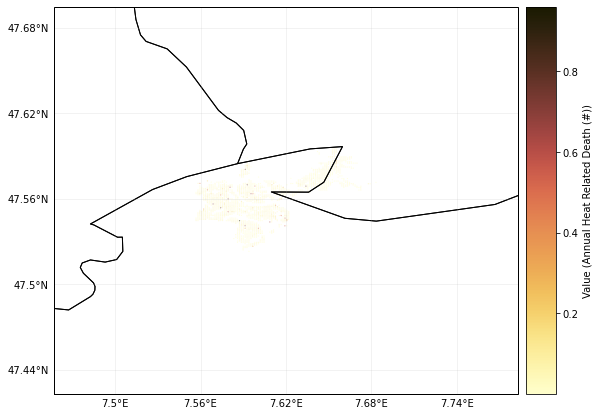

In [6]:

impact = impacts_mortality.matrix_as_impact(median_impact_matrices['RCP85'][2020][category], exposures, unit='Annual Heat Related Death (#)', percentage=False, canton='Basel-Stadt')
impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1)

## Relative change map

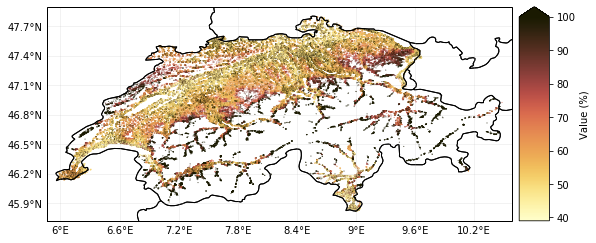

In [17]:
rel_mat = ImpactsHeatMortality.compute_relative_change(impacts_mortality.median_impact_matrices['RCP85'][2050][category], impacts_mortality.median_impact_matrices['RCP85'][2020][category])
impacts_rel = ImpactsHeatMortality.matrix_as_impact(rel_mat, exposures, unit='%')
impacts_rel.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1, vmax=100, extend='max')

#plt.savefig(''.join([fig_dir,'relative_changes_2020_2050_o75.pdf']),bbox_inches='tight')

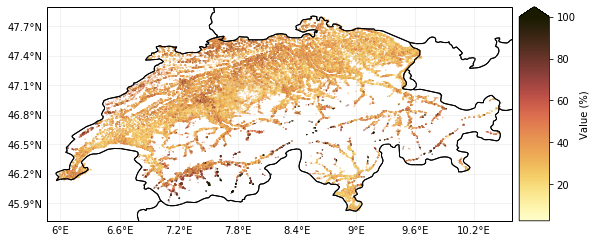

In [19]:
rel_mat = ImpactsHeatMortality.compute_relative_change(impacts_mortality.median_impact_matrices['RCP26'][2050][category], impacts_mortality.median_impact_matrices['RCP26'][2020][category])
impacts_rel = ImpactsHeatMortality.matrix_as_impact(rel_mat, exposures, unit='%')
impacts_rel.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1, vmax=100, extend='max')

#plt.savefig(''.join([fig_dir,'relative_changes_2020_2050_o75.pdf']),bbox_inches='tight')

## Canton Impacts

In [51]:
pickle_in = \
open('../../output/mortality_results/impact_100mc2.pickle','rb')
impacts_mortality = pickle.load(pickle_in)
impacts_mortality.years = [2020,2035,2050,2065,2080]
impacts_mortality.categories = ['Under 75','Over 75']
directory_exposures = '../../input_data/exposures/'
exposures = {}
for code, category in {'O': 'Over 75', 'U': 'Under 75'}.items():    
    exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_', code,'.h5'])
    exposures[category] = Exposures()
    exposures[category].read_hdf5(exposures_file)
    #exposures[category] = Exposures(exposures[category])
    exposures[category].check()

agg_impact_zurich = impacts_mortality.calculate_impact_agg_canton('Ticino', exposures, impacts_mortality.categories)


2020-11-12 18:30:23,928 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O.h5
2020-11-12 18:30:26,008 - climada.entity.exposures.base - INFO - centr_ not set.
2020-11-12 18:30:26,009 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-12 18:30:26,009 - climada.entity.exposures.base - INFO - cover not set.
2020-11-12 18:30:26,010 - climada.entity.exposures.base - INFO - category_id not set.
2020-11-12 18:30:26,010 - climada.entity.exposures.base - INFO - region_id not set.
2020-11-12 18:30:26,012 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_U.h5
2020-11-12 18:30:28,232 - climada.entity.exposures.base - INFO - centr_ not set.
2020-11-12 18:30:28,233 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-12 18:30:28,233 - climada.entity.exposures.base - INFO - cover not set.
2020-11-12 18:30:28,234 - climada.entity.exposures.base - INFO - category_id not s

In [53]:
np.sum(impacts_mortality.median_impact_matrices['RCP85'][2050]['Under 75'])


133.71833210096258

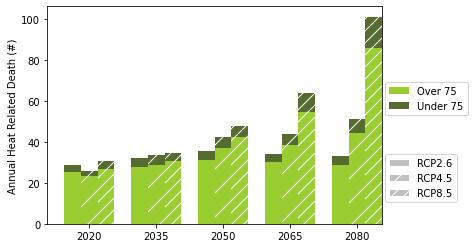

In [9]:
plot_impacts_heat(agg_impact_zurich, 'Annual Heat Related Death (#)', uncertainty=False, color=['yellowgreen', 'darkolivegreen'])



## Make Table with Cantonal Values

In [3]:
pickle_in = \
open('../../output/mortality_results/impact_100mc2.pickle','rb')
impacts_mortality = pickle.load(pickle_in)
impacts_mortality.years = [2020,2035,2050,2065,2080]

directory_exposures = '../../input_data/exposures/'
exposures = {}
for code, category in {'O': 'Over 75', 'U': 'Under 75'}.items():
    exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_', code, '.h5'])
    exposures[category] = Exposures()
    exposures[category].read_hdf5(exposures_file)
   # exposures[category] = exposures[category][exposures[category]['canton'] == 'Zürich']
    exposures[category] = Exposures(exposures[category])
    exposures[category].check()
    
categories_short = {'Under 75':'<75', 'Over 75':'≥75'}    
cantonal_impacts_df = impacts_mortality.cantonal_impacts_df(exposures, scenarios=['RCP26', 'RCP85'], years=[2020,2050,2080], categories_short=categories_short)


2020-11-24 16:27:03,472 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O.h5
2020-11-24 16:27:05,531 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-11-24 16:27:05,532 - climada.entity.exposures.base - INFO - centr_ not set.
2020-11-24 16:27:05,533 - climada.entity.exposures.base - INFO - deductible not set.
2020-11-24 16:27:05,533 - climada.entity.exposures.base - INFO - cover not set.
2020-11-24 16:27:05,534 - climada.entity.exposures.base - INFO - category_id not set.
2020-11-24 16:27:05,534 - climada.entity.exposures.base - INFO - region_id not set.
2020-11-24 16:27:05,536 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_U.h5
2020-11-24 16:27:07,501 - climada.entity.exposures.base - INFO - crs set to default value: {'init': 'epsg:4326', 'no_defs': True}
2020-11-24 16:27:07,502 - climada.entity.exposures.base - INFO - cen

In [4]:
with pd.option_context("max_colwidth", 1000):
    print(cantonal_impacts_df.astype(int).to_latex(multicolumn=True))


\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{6}{l}{RCP2.6} & \multicolumn{6}{l}{RCP8.5} \\
{} & \multicolumn{2}{l}{2020} & \multicolumn{2}{l}{2050} & \multicolumn{2}{l}{2080} & \multicolumn{2}{l}{2020} & \multicolumn{2}{l}{2050} & \multicolumn{2}{l}{2080} \\
{} &    ≥75 & <75 &  ≥75 & <75 &  ≥75 & <75 &    ≥75 & <75 &  ≥75 &  <75 &   ≥75 &  <75 \\
canton                 &        &     &      &     &      &     &        &     &      &      &       &      \\
\midrule
Aargau                 &     12 &   1 &   16 &   2 &   15 &   2 &     11 &   2 &   17 &    4 &    38 &    9 \\
Appenzell Ausserrhoden &      4 &   0 &    5 &   0 &    6 &   0 &      4 &   0 &    8 &    0 &    15 &    2 \\
Appenzell Innerrhoden  &      4 &   0 &    5 &   0 &    5 &   0 &      4 &   0 &    7 &    0 &    14 &    1 \\
Basel-Landschaft       &     17 &   2 &   22 &   3 &   22 &   3 &     16 &   2 &   25 &    5 &    53 &   13 \\
Basel-Stadt            &     54 &  12 &   69 &  16 &   66 &  17 &     52 